In [73]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2

from skimage.io import imread_collection, imshow
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from skimage import color
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
sns.set()
plt.rcParams["axes.grid"] = False

In [2]:
paintings = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')

In [3]:
len(paintings)

121

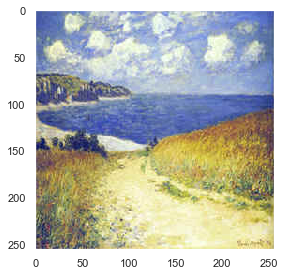

In [4]:
imshow(paintings[0])

In [5]:
generated = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [6]:
len(generated)

751

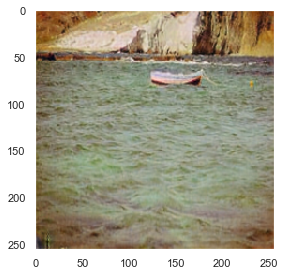

In [7]:
imshow(generated[0])

In [8]:
paint = paintings[30:40]
gen = generated[30:40]

In [9]:
def color_quantization(original, n_colors=256):
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    
    return less_colors, centers, labels, kmeans.predict(arr), kmeans

In [10]:
mp_pallete = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans = color_quantization(i, 256)
    mp_pallete.extend(np.unique((centers.astype(np.int)), axis=-1))

100%|██████████| 10/10 [04:12<00:00, 25.26s/it]


In [11]:
len(mp_pallete)

2560

In [12]:
mp_pallete = np.array(mp_pallete)

In [13]:
kmeans = KMeans(n_clusters=mp_pallete.shape[0] , init=mp_pallete, max_iter=1, n_init=1)

In [14]:
paint = np.array(paint)

In [15]:
paint_fit  = paint.reshape((-1, 3))

In [16]:
paint_fit.shape

(655360, 3)

In [17]:
kmeans.fit(paint_fit)

KMeans(init=array([[ 32,  55,  66],
       [126, 175, 182],
       [194, 216, 234],
       ...,
       [165, 168, 123],
       [136, 115,  97],
       [159, 125,  84]]),
       max_iter=1, n_clusters=2560, n_init=1)

In [18]:
paint_predict = paint_fit.reshape((-1, 3))

In [19]:
paint_prediction = kmeans.predict(paint_predict)

In [20]:
gen = np.array(gen)
gen_toPredict = gen.reshape((-1, 3))

In [21]:
generated_prediction = kmeans.predict(gen_toPredict)

In [22]:
generated_prediction.shape

(655360,)

In [23]:
paint_prediction.shape

(655360,)

In [24]:
quantized_imX, binEdges_1 = np.histogram(paint_prediction)
print(quantized_imX)
print(binEdges_1)

[ 37617  88660  78241 131277  54953  40742  66119  51442  24203  82106]
[   0.   255.9  511.8  767.7 1023.6 1279.5 1535.4 1791.3 2047.2 2303.1
 2559. ]


In [25]:
quantized_imY, binEdges_2 = np.histogram(generated_prediction)
print(quantized_imY)
print(binEdges_2)

[52140 55603 95527 83073 65906 78990 52954 85307 17211 68649]
[   0.   255.9  511.8  767.7 1023.6 1279.5 1535.4 1791.3 2047.2 2303.1
 2559. ]


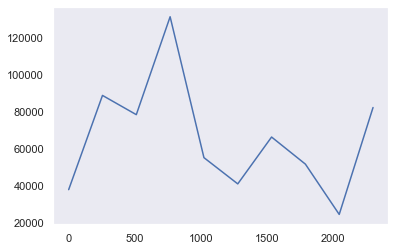

In [26]:
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX)

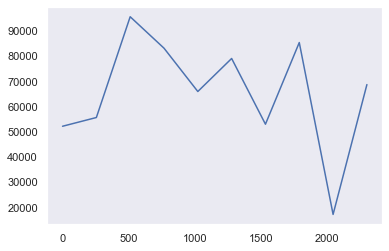

In [27]:
#generated paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)

<Figure size 1440x1440 with 0 Axes>

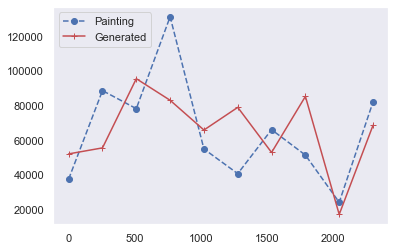

In [28]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=2)
plt.draw()

In [60]:
paint100 = paintings[:100]
gen100 = generated[:100]

In [61]:
mpPallete = []
for i in tqdm(paint100):
    less_colors, centers, labels, clusters, kmeans = color_quantization(i, 256)
    mpPallete.extend(np.unique((centers.astype(np.int)), axis=-1))

100%|██████████| 100/100 [43:09<00:00, 25.90s/it]


In [62]:
mpPallete = np.array(mpPallete)

In [63]:
paint100 = np.array(paint100)
gen100 = np.array(gen100)

In [64]:
paint100  = paint100.reshape((-1, 3))
gen100  = gen100.reshape((-1, 3))

In [65]:
#MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=mpPallete.shape[0] , init=mpPallete, max_iter=1, n_init=1)

In [66]:
mbk.fit(paint100)

MiniBatchKMeans(init=array([[137, 156, 199],
       [138, 145,  99],
       [245, 241, 196],
       ...,
       [187, 194, 206],
       [ 99,  92,  99],
       [ 89, 115, 170]]),
                max_iter=1, n_clusters=25600, n_init=1)

In [67]:
paintPrediction = mbk.predict(paint100)

In [68]:
generatedPrediction = mbk.predict(gen100)

<Figure size 1440x1440 with 0 Axes>

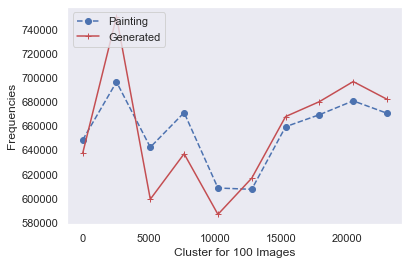

In [71]:
quantizedImX, binEdges1 = np.histogram(paintPrediction)
quantizedImY, binEdges2 = np.histogram(generatedPrediction)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('Frequencies')
plt.draw()

<ipython-input-95-d3b839010abd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


<Figure size 1440x1440 with 0 Axes>

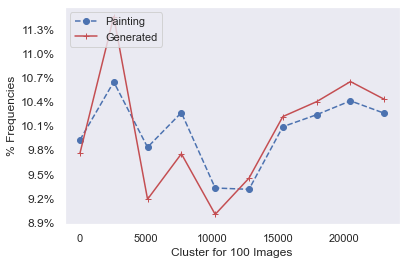

In [95]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(paintPrediction)
quantizedImY, binEdges2 = np.histogram(generatedPrediction)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()